In [13]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [14]:
df = pd.read_csv('http://bit.ly/w-data')

In [15]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
df.shape

(25, 2)

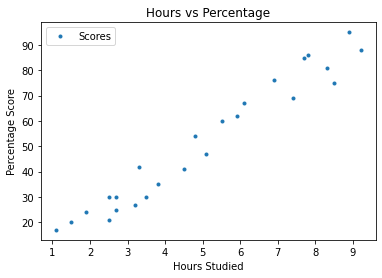

In [18]:
df.plot(x="Hours", y="Scores", style= '.')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [19]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [21]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train) 
print("Model Trained")

Model Trained


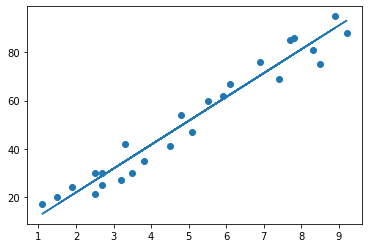

In [22]:
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [23]:
print('Test Score', model.score(X_test, y_test))
print('Training Score', model.score(X_train, y_train))

Test Score 0.9454906892105356
Training Score 0.9515510725211552


In [24]:
print(X_test)
y_pred = model.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
print('Score of the student hours = 9.5', model.predict([[9.25]]))

Score of the student hours = 9.5 [93.69173249]


In [27]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error', metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error 4.183859899002975
Mean squared Error 21.5987693072174
